### Projet: Prédire le score d'efficacité des joueurs de basket

### 1. Importation du jeu de donnée

In [37]:
# importons les packages

import pandas as pd

In [38]:
# on importe le dataframe

player_df = pd.read_csv('./player_data.csv', sep=",")

print(f"Notre jeu de donnée a {player_df.shape[0]} lignes et {player_df.shape[1]} colonnes")

Notre jeu de donnée a 46 lignes et 16 colonnes


In [39]:
player_df.head()

,ID,points,possessions,team_pace,Unnamed: 4,Unnamed: 5,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,NaN,NaN,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,NaN,NaN,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,NaN,NaN,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,NaN,NaN,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,NaN,NaN,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38



## 2. Nettoyage du jeu de donnée

- De bonnes pratiques ont-elles été utilisées pour 

- collecter les données ?

- Des biais ont-ils été introduits dans les données ?

- Existe-t-il des données qui n’ont pas été collectées et qui pourraient influencer nos découvertes ?

Nous allons explorer les données en recherchant les valeurs manquantes, les valeurs abérrantes...

**Description des variables**

Nom de la colonne	Description
*id*	Identificateur unique de chaque joueur dans le jeu de données

*points*	Nombre total de points marqués par un joueur dans une saison

*possessions*	Nombre total de possessions par un joueur dans une saison

*team_pace*	Nombre moyen de possessions qu’une équipe utilise par match

*Unnamed: 4*	Données inconnues

*Unnamed: 5*	Données inconnues

*GP*	Matches joués par un joueur dans une saison

*MPG*	Nombre moyen de minutes jouées par un joueur par match

*TS %*	Pourcentage de tirs réel, le pourcentage de tirs du joueur, en tenant compte des lancers francs et des lancers à trois points

*AST*	Ratio de passe décisive, le pourcentage de possessions d’un joueur qui se terminent par une passe décisive

*TO*	Ratio de perte de balle, le pourcentage de possessions d’un joueur qui se terminent par une perte de balle

*USG*	Taux d’utilisation, le nombre de possessions qu’un joueur utilise par période de 40 minutes

*ORR*	Taux de rebonds offensifs
*DRR* Taux de rebonds défensifs

*REBR*	Taux de rebonds, le pourcentage de tirs manqués qu’un joueur a effectués au rebond

*PER*	Score d’efficacité du joueur, la mesure de la productivité d’un joueur par minute sur le terrain

On pourra utiliser cette dernière colonne pour prédire l'efficacité d'un joueur pendant un match. 

Actuellement, le joueur qui a le score le plus élevé est Luka Doncic avec un score de 37.4 suivi de Giannis Antetokounmpo avec 35.1 points

### a. Rechercher les valeurs manquantes

In [40]:
# verification des valeurs manquantes

player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
Unnamed: 4     46
Unnamed: 5     46
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [41]:
# info

player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           46 non-null     int64  
 1   points       43 non-null     float64
 2   possessions  43 non-null     float64
 3   team_pace    43 non-null     float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   GP           39 non-null     float64
 7   MPG          40 non-null     float64
 8   TS%          45 non-null     float64
 9   AST          45 non-null     float64
 10  TO           45 non-null     float64
 11  USG          45 non-null     float64
 12  ORR          45 non-null     float64
 13  DRR          45 non-null     float64
 14  REBR         45 non-null     float64
 15  PER          36 non-null     float64
dtypes: float64(15), int64(1)
memory usage: 5.9 KB


On constate qu'il y a 46 lignes . Les colonnes sans nom ont toutes des valeurs manquantes ou `nan`. On pourrait donc les éliminer

In [42]:
player_df.dropna(axis='columns', inplace=True, how='all')
"""inplace pour lui indiquer de supprimer ces colonnes dans le DataFrame player_df d’origine"""
player_df.head()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38


In [43]:
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [44]:
# je veux supprimer toutes les lignes qui n'ont pas au moins 12 valeurs non nulles

player_df.dropna(inplace=True, thresh=12)

player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

On remarque à présent qu'on a 3 Colonnes uniquement qui ont des valeurs manquantes. Certaines lignes ont des valeurs manquantes, mais il y en a tellement peu que l'on veut bien les conserver. On complètera ces valeurs manquantes par des valeurs de remplacement. 

In [45]:
player_df.head(15)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
9,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN
10,11,1856.0,1303.8,93.4,55.0,33.6,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.67


In [46]:
# On remarque que les lignes ayant les valeurs manquantes spécifiées ont été supprimé mais l'index est resté le même
# On devrait réinitialiser cet index:

player_df.reset_index(drop=True, inplace=True)
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     int64  
 1   points       42 non-null     float64
 2   possessions  42 non-null     float64
 3   team_pace    42 non-null     float64
 4   GP           36 non-null     float64
 5   MPG          37 non-null     float64
 6   TS%          42 non-null     float64
 7   AST          42 non-null     float64
 8   TO           42 non-null     float64
 9   USG          42 non-null     float64
 10  ORR          42 non-null     float64
 11  DRR          42 non-null     float64
 12  REBR         42 non-null     float64
 13  PER          33 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 4.7 KB


#### 2. Analyse exploratoire

In [47]:
# analyse descriptive du jeu de donnée

player_df.describe()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
count,42.000000,42.000000,42.000000,42.000000,36.000000,37.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,33.000000
mean,23.738095,1592.380952,1346.323810,106.526190,59.861111,35.27027,0.596357,26.221429,13.083333,30.478571,4.280952,14.850000,8.497619,22.594242
std,13.826555,351.876707,214.503887,6.676791,5.576239,1.91135,0.029284,5.199275,2.038282,4.919079,2.074025,7.277538,4.995876,7.255338
min,1.000000,183.000000,147.300000,89.700000,48.000000,30.50000,0.511000,14.800000,9.200000,16.500000,0.000000,0.900000,-2.900000,8.710000
25%,12.250000,1390.750000,1283.650000,102.400000,55.750000,34.10000,0.572250,23.275000,11.350000,26.975000,2.925000,8.475000,5.225000,20.120000
50%,23.500000,1680.000000,1369.800000,106.800000,60.500000,35.40000,0.604000,27.200000,13.500000,30.650000,4.650000,16.800000,9.150000,24.230000
75%,35.750000,1826.250000,1444.050000,111.950000,64.000000,36.90000,0.618750,30.550000,14.775000,34.850000,5.900000,20.325000,12.875000,28.380000
max,46.000000,2062.000000,1542.000000,118.800000,69.000000,38.80000,0.645000,33.200000,16.200000,36.700000,8.300000,29.400000,16.400000,34.260000


La moyenne des points des 42 joueurs est de 1592.38 points. Il y a 183 points au minimum et 2062 points au maximum. Les points minimum (183) peuvent être des valeurs hors norme. 


La boîte dans diagramme en boîte fait référence à une boîte dessinée autour de la plage de données qui va du 25ème centile au 75ème centile. (Ces centiles délimitent les quartiles importants des données.Leur plage est appelée interquartile.)

Le box plot est important car cela nous permet de détecter les valeurs aberrantes. 

In [48]:
# on importe les packages de visualisation

import matplotlib.pyplot as plt
import seaborn as sns

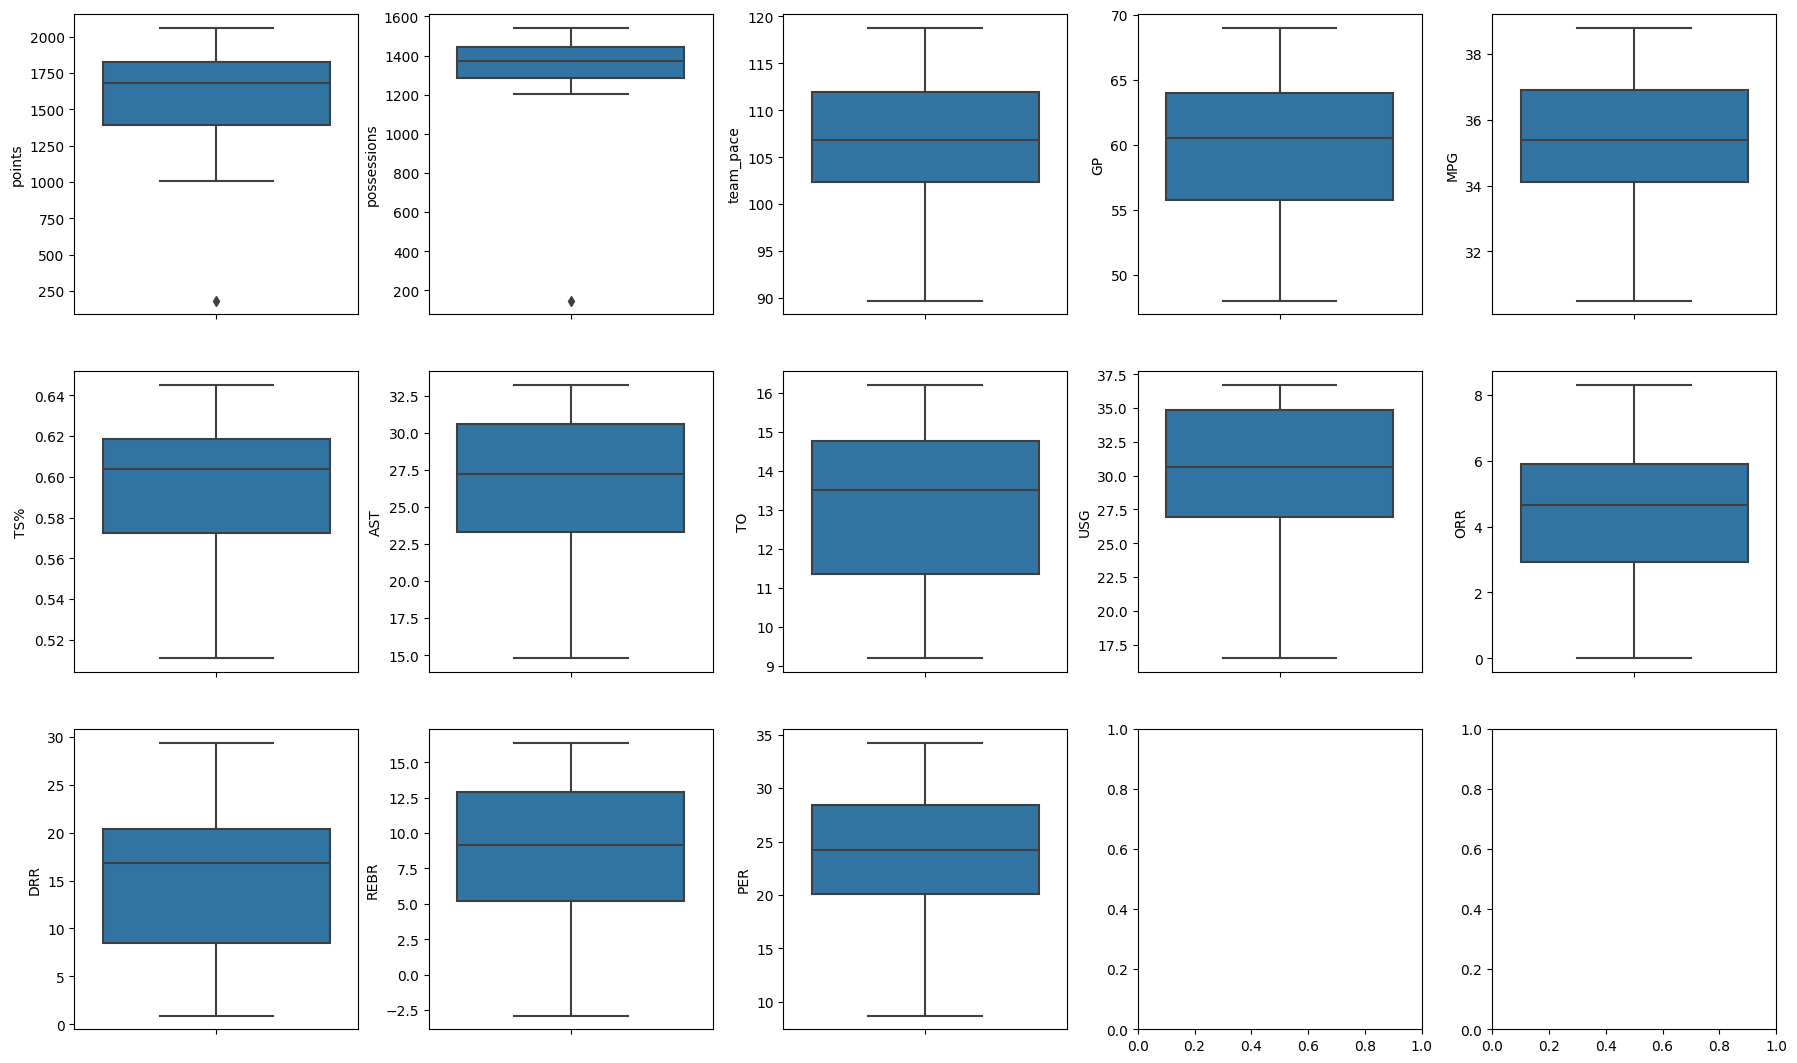

In [49]:
# créer une liste des noms de colonnes en excluant ID

#cols = list(player_df.iloc[:, 1:])
cols = player_df.columns[1:]

# créeer une matrice de sous diagramme afin de disposer d'une seule figure montrant les 13 colonnes

fig, axes = plt.subplots(3,5, figsize=(18,11))

# créer un remplissage autour des sous diagramme pour en faciliter la lecture

fig.tight_layout(pad=2.0)

# créer un diagramme en boite en faisant une boucle : 

for i in range(len(cols)):
    sns.boxplot(ax=axes[i//5, i%5], y=player_df[cols[i]])

On remarque qu'il y a deux valeurs abérrantes (hors normes) dans `points` et `possessions`. Les valeurs sont très éloignés des autres données. Elles peuvent être incohérentes. 


In [50]:
#identifions l'index de la ligne avec la plus petite valeurs dans 'points': 

points_outlier = player_df['points'].idxmin()
points_outlier

35

In [51]:
#identifions l'index de la ligne avec la plus petite valeurs dans 'possessions': 

possession_outlier = player_df['possessions'].idxmin()
possession_outlier

35

On remarque que les valeurs aberrantes sont toutes dans la même ligne (ligne 35). 
On peut la supprimer tout simplement. 

In [52]:
#supprimer les lignes avec outlier

player_df.drop(player_df.index[points_outlier], inplace=True)

# reinitilaliser l'Index
player_df.reset_index(drop=True, inplace=True)

player_df.tail(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
35,41,2030.0,1431.0,112.3,68.0,37.0,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.07
36,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40
37,43,1828.0,1507.2,112.7,64.0,36.5,0.618,31.3,14.0,34.9,5.9,21.3,14.5,NaN
38,44,1821.0,1443.7,118.8,66.0,36.6,0.609,27.3,13.5,35.8,7.0,23.8,11.5,22.96
39,45,1740.0,1443.9,114.1,68.0,37.1,0.611,26.6,15.2,29.3,8.3,17.7,11.1,21.22
40,46,1993.0,1459.0,112.5,NaN,36.9,0.627,30.4,15.0,33.7,6.3,19.3,14.1,28.76


#### Exploration des données 

In [53]:
# Vérification des valeurs manquantes

player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

Il y a pas mal de valeurs manquantes quand même. On pourrait par exemple les remplacer par la médiane ou la moyenne.

On peut dores et déjà vérifier la distribution du dataset. 

## Histogramme 

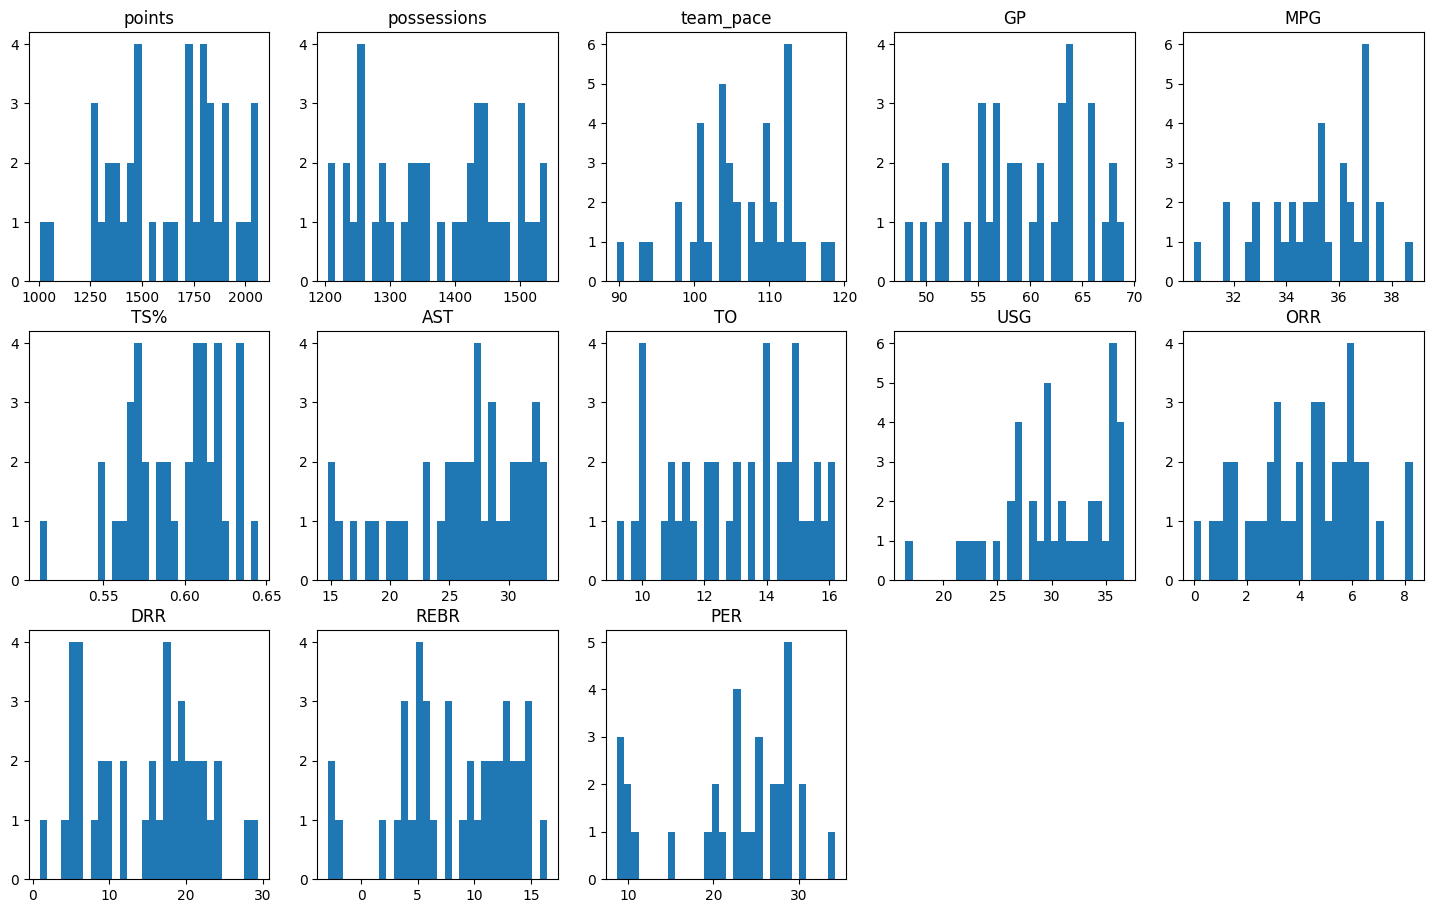

In [54]:
# définir la taille de la figure
fig = plt.figure(figsize=(18,11))
fig.tight_layout(pad=5.0)

# faire une boucle qui affiche toute notre distribution:

for i in range(len(cols)): 
    plt.subplot(3,5, i+1)
    plt.hist(player_df[cols[i]], bins=30)
    plt.title(cols[i])
    #plt.show()

On remarque que la plupart des histogrammes n'apparaissent pas distribués normalement. Mais il est difficile d'en être certain. 

(array([0.04081633, 0.        , 0.04081633, 0.        , 0.04081633,
        0.08163265, 0.        , 0.        , 0.04081633, 0.        ,
        0.12244898, 0.04081633, 0.12244898, 0.        , 0.08163265,
        0.08163265, 0.        , 0.04081633, 0.08163265, 0.        ,
        0.04081633, 0.12244898, 0.16326531, 0.        , 0.        ,
        0.12244898, 0.        , 0.04081633, 0.08163265, 0.04081633]),
 array([48. , 48.7, 49.4, 50.1, 50.8, 51.5, 52.2, 52.9, 53.6, 54.3, 55. ,
        55.7, 56.4, 57.1, 57.8, 58.5, 59.2, 59.9, 60.6, 61.3, 62. , 62.7,
        63.4, 64.1, 64.8, 65.5, 66.2, 66.9, 67.6, 68.3, 69. ]),
 <BarContainer object of 30 artists>)

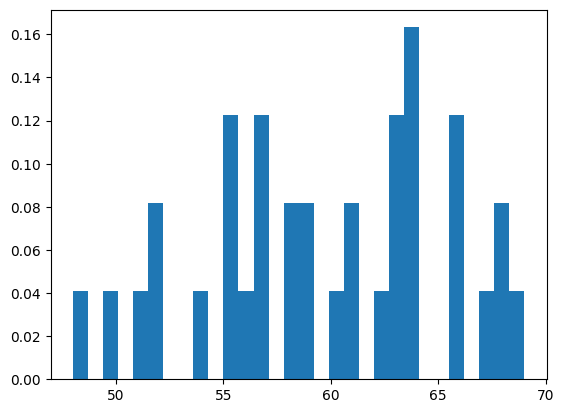

In [55]:
# regardons la distribution de GP: Matches joués par un joueur dans une saison

plt.hist(player_df['GP'],density=True, bins=30)

C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Gp histogram'}, xlabel='GP', ylabel='Density'>

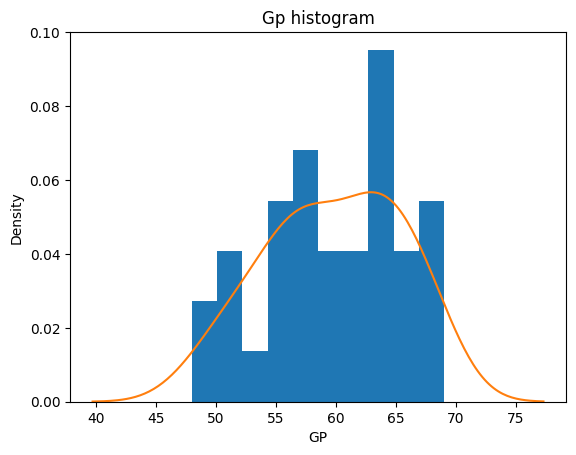

In [56]:
# tracer la densité de probabilité de GP

plt.hist(player_df['GP'], density=True, bins=10)
plt.title('Gp histogram')
sns.kdeplot(player_df['GP'])


In [57]:
# utiliser une boucle for pour generer une matrice KDEQ pour toutes les colonnes

fig, axes = plt.subplot(3, 5, figsize=(18,11))
fig.tight_layout(pad=2.0)

# faire la boucle 
for i in range(len(cols)):
    sns.kdeplot(ax=axes[i//5, i%5], data=player_df[cols[i]])


TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>